In [10]:
#import logging
import pandas as pd

folder_input ="/vast/blangme2/smajidi5/metagenomics/changek/simulatation/classification_pbsim/max15/"
truth_file=folder_input+"true_tax.csv" # generated by generate_training.ipynb

merged = pd.read_csv(truth_file, names=["read_name", "taxon"])
dic_tax_truth={}
for index, row in merged.iterrows():
    dic_tax_truth[row['read_name']]=row['taxon']
print("Number of reads in the truth file: "+str(len(dic_tax_truth)))


Number of reads in the truth file: 86202


In [ ]:
# # takes max 10 per species

# tree_file=in_folder+"nodes.dmp"
# tax_genome_file= in_folder + "seqid2taxid.map_tax_uniq"

# info, Tree, tax_index, tax_genome, parents, tree_df = get_tax_info(tree_file,tax_genome_file)    
# tax2path, tax2depth = get_tax2path(tax_genome, info, parents)


# num_max=10
# counter_tax={}
# readids_max=set()
# for read_name, tax_true in dic_tax_truth.items():

#     to_add=True
#     if not tax_true in counter_tax:
#         counter_tax[tax_true]=1
#     else:
#         if counter_tax[tax_true]>num_max:
#             to_add=False 
#         counter_tax[tax_true]+=1
            
#     if to_add:
#         readids_max.add(read_name)
# print(len(dic_tax_truth),len(readids_max))


In [11]:
read_names= sorted(list(dic_tax_truth.keys()))
import random
random.seed(11)
num_train= int(len(read_names)*0.8)

read_names_train = random.sample(read_names, num_train)
read_names_train_set=set(read_names_train)
read_names_test = set([i for i in read_names if i not in read_names_train_set])
print(len(read_names),len(read_names_train),len(read_names_test))


86202 68961 17241


In [ ]:

for case in ['k17', 'k19', 'k21', 'k23', 'k25', 'k27', 'k29', 'k31']:
    print(case)
    kraken_file=folder_input+case+"_out"
    kraken_file_out=folder_input+"/max15_80/"+case+"_out"
    file_in=open(kraken_file,'r')
    file_out=open(kraken_file_out,'w')
    for line in file_in: 
        line_split=line.strip().split("\t")
        #classified ,read_id, tax_krak, read_len, dic = line_split
        read_id=line_split[1]
        if read_id in read_names_train:
            file_out.write(line.strip()+"\n")
    file_in.close()
    file_out.close()

In [ ]:

for case in ['k17', 'k19', 'k21', 'k23', 'k25', 'k27', 'k29', 'k31']:
    print(case)
    kraken_file=folder_input+case+"_out"
    kraken_file_out=folder_input+"/max15_20/"+case+"_out"
    file_in=open(kraken_file,'r')
    file_out=open(kraken_file_out,'w')
    for line in file_in: 
        line_split=line.strip().split("\t")
        #classified ,read_id, tax_krak, read_len, dic = line_split
        read_id=line_split[1]
        if read_id in read_names_test:
            file_out.write(line.strip()+"\n")
    file_in.close()
    file_out.close()

In [ ]:
read_ids_notfound=[]
file_in=open(folder_input+"true_tax.csv",'r')
file_out_test=open(folder_input+"max15_20/true_tax.csv",'w')
file_out_train=open(folder_input+"max15_80/true_tax.csv",'w')
for line in file_in: 
    if not line.strip():
        continue
    line_split=line.strip().split(",") # NZ_PHSM01000046.1__1_1,29339
    read_id=line_split[0]
    if read_id in read_names_test:
        file_out_test.write(line.strip()+"\n")
    elif read_id in read_names_train:
        file_out_train.write(line.strip()+"\n")
    else:
        read_ids_notfound.append(read_id)
file_in.close()
file_out_train.close()
file_out_test.close()
print("done", folder_input+"max15_20/true_tax.csv", folder_input+"max15_80/true_tax.csv")
print(len(read_ids_notfound))


done <_io.TextIOWrapper name='/vast/blangme2/smajidi5/metagenomics/changek/simulatation/classification_pbsim/max15/max15_80/true_tax.csv' mode='w' encoding='UTF-8'> <_io.TextIOWrapper name='/vast/blangme2/smajidi5/metagenomics/changek/simulatation/classification_pbsim/max15/max15_20/true_tax.csv' mode='w' encoding='UTF-8'>
0


In [ ]:
# sample 1k reads

In [3]:
import pandas as pd
folder="/vast/blangme2/smajidi5/metagenomics/changek/simulatation/classification_pbsim/max15/t1k/"
df=pd.read_csv(folder+"true_tax.csv",names=["read_name","taxon"])
read_names=list(df['read_name'])
print(len(read_names))
df.head(2)
# $ head true_tax.csv
# NZ_PHSM01000046.1__1_1,29339


1000


,read_name,taxon
0,NZ_PHSM01000046.1__1_1,29339
1,NZ_PHSM01000047.1__1_1,29339


In [4]:
fastq_file="/vast/blangme2/smajidi5/metagenomics/changek/simulatation/long/reads.fq"
handle= open(fastq_file, 'r')
reads = {}
line_count = 0
for line in handle:
    line = line.strip()
    line_count += 1
    if line_count % 4 == 1:
        if not line_count==1:
            reads[read_name]=lines
        lines=[line]
        read_name=line[1:]
    elif line_count % 4 == 2 or line_count % 4 == 3 or line_count % 4 == 0:
        lines.append(line)
reads[read_name]=lines

In [13]:
len(reads)

249069

In [ ]:
f_out="/vast/blangme2/smajidi5/metagenomics/changek/simulatation/classification_pbsim/max15/t1k/"
hanld=open(f_out+"reads_.fq", "w")
for read_name, lines in reads.items():
    if read_name in read_names:
        for line in lines:
            hanld.write(line + "\n")
hanld.close()


In [14]:
f_out="/vast/blangme2/smajidi5/metagenomics/changek/simulatation/classification_pbsim/max15/max15_20/"
hanld=open(f_out+"reads_.fq", "w")
for read_name, lines in reads.items():
    if read_name in read_names_test:
        for line in lines:
            hanld.write(line + "\n")
hanld.close()


In [15]:
f_out="/vast/blangme2/smajidi5/metagenomics/changek/simulatation/classification_pbsim/max15/max15_80/"
hanld=open(f_out+"reads_.fq", "w")
for read_name, lines in reads.items():
    if read_name in read_names_train:
        for line in lines:
            hanld.write(line + "\n")
hanld.close()


In [19]:
line_count

5

In [ ]:
reads_quality = {}
handle=open(fastq_file, 'r')
line_count = 0
for line in handle:
    line = line.strip()
    line_count += 1
    if line_count % 4 == 1:
        read_id=line[1:].strip()
        if not line.startswith('@'):
            raise ValueError(f"Invalid FASTQ format: Expected header line starting with '@', got: {line}")
        #current_read = {'header': line[1:], 'sequence': '', 'quality_header': '', 'quality': ''}                    
    elif line_count % 4 == 0:
        quality_scores = [ord(q) - 33 for q in line]  # Convert to Phred scores
        reads_quality[read_id]= quality_scores
    

ValueError: Invalid FASTQ format: Expected header line starting with '@', got: +NZ_PHSM01000046.1__1_1

In [1]:
def parse_fastq_reads(fastq_file):
    reads_quality = {}
    handle=open(fastq_file, 'r')
    line_count = 0
    for line in handle:
        line = line.strip()
        line_count += 1
        if line_count % 4 == 1:
            read_id=line[1:].strip()
            if not line.startswith('@'):
                raise ValueError(f"Invalid FASTQ format: Expected header line starting with '@', got: {line}")
            #current_read = {'header': line[1:], 'sequence': '', 'quality_header': '', 'quality': ''}                    
        elif line_count % 4 == 0:
            quality_scores = [ord(q) - 33 for q in line]  # Convert to Phred scores
            reads_quality[read_id]= quality_scores
       
    return reads_quality


read_folder = "/vast/blangme2/smajidi5/metagenomics/changek/simulatation/classification_pbsim/max15/max15_80/reads_.fq"
reads_quality=parse_fastq_reads(read_folder)



In [2]:
import numpy as np
reads_quality_features={}
if reads_quality:
    for read_name, read_quality in reads_quality.items():
        reads_quality_features[read_name]= np.mean(read_quality)
        #[np.mean(read_quality), np.median(read_quality), np.percentile(read_quality, 10), np.percentile(read_quality, 90)]
len(reads_quality_features)   

68961

In [4]:
np.mean(list(reads_quality_features.values()))

np.float64(12.085886917293617)

In [8]:
percentile_10=np.percentile(list(reads_quality_features.values()), 10)
percentile_10

np.float64(6.798438608942512)

In [ ]:
low_quality_reads= [read_name for read_name, q in reads_quality_features.items() if q<percentile_10]
len(low_quality_reads)


6895

In [11]:
folder="/vast/blangme2/smajidi5/metagenomics/metakpick_project/runs/"

In [12]:
write_file=open(folder+"low_quality_reads_max80_percentile10_q6.7.txt", "w")
for read in low_quality_reads:
    write_file.write(read+"\n")
write_file.close()


In [16]:
percentile_80=np.percentile(list(reads_quality_features.values()), 80)
print(percentile_80)
high_quality_reads= [read_name for read_name, q in reads_quality_features.items() if q>percentile_80]
len(high_quality_reads)


write_file=open(folder+"high_quality_reads_max80_percentile80_q"+str(round(percentile_80,1))+".txt", "w")
for read in high_quality_reads:
    write_file.write(read+"\n")
write_file.close()





14.004941688080649


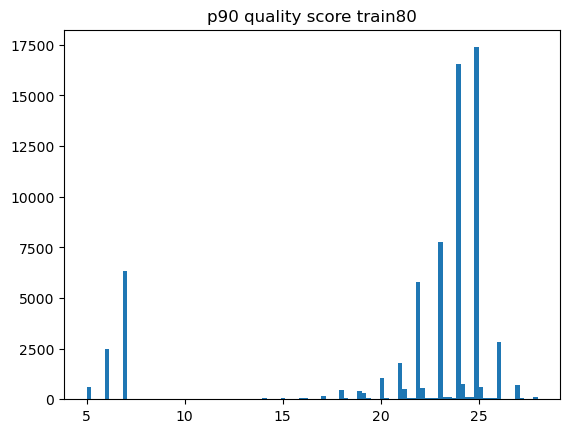

In [39]:
import matplotlib.pyplot as plt
median_q= [i[3] for i in reads_quality_features.values()]
plt.hist(median_q, bins=100)
plt.title("p90 quality score train80")
plt.show()


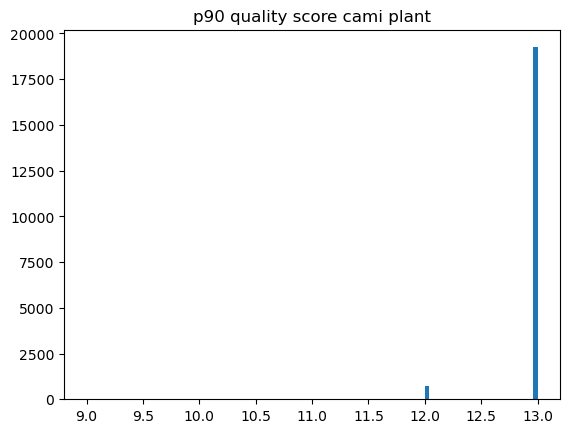

In [41]:
import matplotlib.pyplot as plt
median_q= [i[3] for i in reads_quality_features_cami_plant.values()]
plt.hist(median_q, bins=100)
plt.title("p90 quality score cami plant")
plt.show()


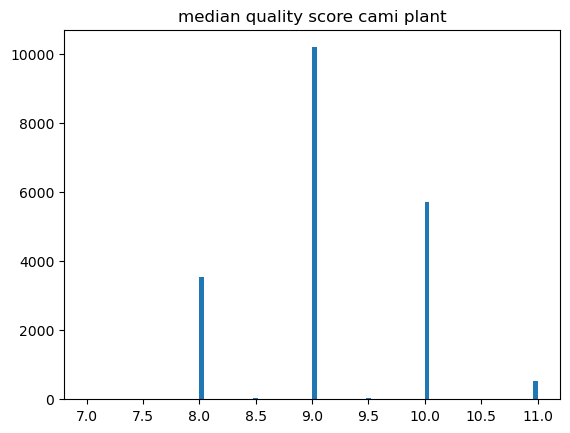

In [37]:
import matplotlib.pyplot as plt
median_q= [i[1] for i in reads_quality_features_cami_plant.values()]
plt.hist(median_q, bins=100)
plt.title("median quality score cami plant")
plt.show()


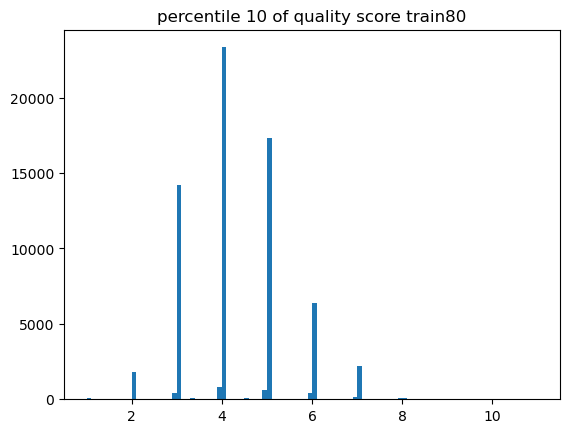

In [35]:
import matplotlib.pyplot as plt
p10_q= [i[2] for i in reads_quality_features.values()]
plt.hist(p10_q, bins=100)
plt.title("percentile 10 of quality score train80")
plt.show()


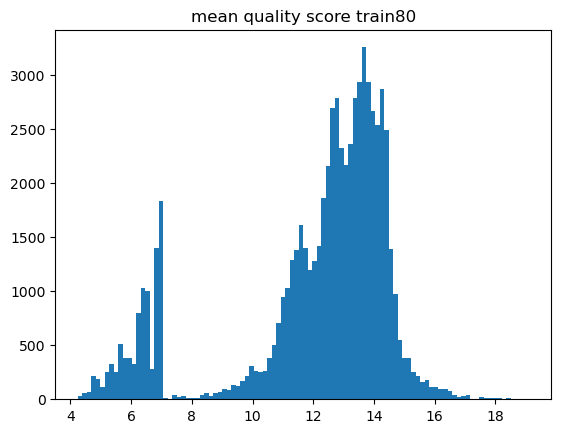

In [31]:
import matplotlib.pyplot as plt
mean_q= [i[0] for i in reads_quality_features.values()]
plt.hist(mean_q, bins=100)
plt.title("mean quality score train80")
plt.show()


In [18]:
#read_folder = "/vast/blangme2/smajidi5/metagenomics/changek/simulatation/classification_pbsim/max15/max15_80/reads_.fq"
read_folder = "/vast/blangme2/smajidi5/metagenomics/changek/kraken1/cami_plant_long0_20k/reads_.fq"
reads_quality_cami_plant=parse_fastq_reads(read_folder)


In [19]:
import numpy as np
reads_quality_features_cami_plant={}
for read_name, read_quality in reads_quality_cami_plant.items():
    reads_quality_features_cami_plant[read_name]= [np.mean(read_quality), np.median(read_quality), np.percentile(read_quality, 10), np.percentile(read_quality, 90)]
len(reads_quality_features_cami_plant)   


20000

In [20]:
len(reads_quality_features_cami_plant)   


20000

np.float64(8.7500199920032)

In [30]:
percentile_80=np.percentile([i[0] for i in list(reads_quality_features_cami_plant.values())]  , 80)
print(percentile_80)
high_quality_reads= [read_name for read_name, q in reads_quality_features_cami_plant.items() if q[0] >percentile_80] # compare mean
len(high_quality_reads)

write_file=open(folder+"high_quality_reads_camiplant_20k_percentile80_q"+str(round(percentile_80,1))+".txt", "w")
for read in high_quality_reads:
    write_file.write(read+"\n")
write_file.close()





8.7500199920032


In [34]:
percentile_10=np.percentile([i[0] for i in list(reads_quality_features_cami_plant.values())]  , 10)
print(percentile_10)
low_quality_reads= [read_name for read_name, q in reads_quality_features_cami_plant.items() if q[0] <percentile_10] # compare mean
len(low_quality_reads)

write_file=open(folder+"low_quality_reads_camiplant_20k_percentile10_q"+str(round(percentile_10,1))+".txt", "w")
for read in low_quality_reads:
    write_file.write(read+"\n")
write_file.close()





7.849026030101159


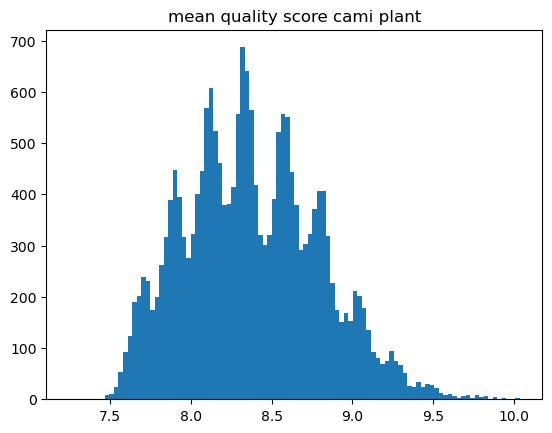

In [30]:
import matplotlib.pyplot as plt
mean_q= [i[0] for i in reads_quality_features_cami_plant.values()]
plt.hist(mean_q, bins=100)
plt.title("mean quality score cami plant")
plt.show()


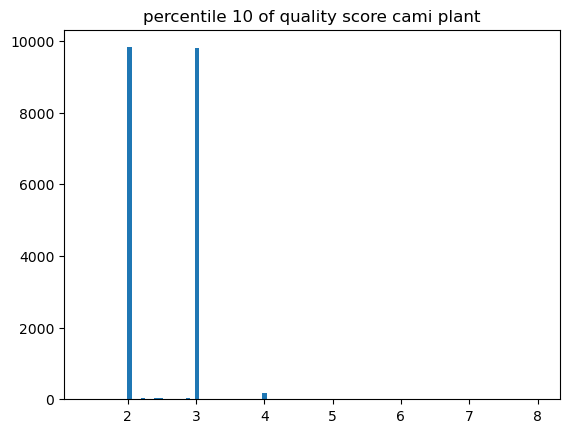

In [34]:
import matplotlib.pyplot as plt
p10_q= [i[2] for i in reads_quality_features_cami_plant.values()]
plt.hist(p10_q, bins=100)
plt.title("percentile 10 of quality score cami plant")
plt.show()


In [22]:
len(reads_quality),reads_quality['NZ_PHSM01000046.1__1_1'][:20]

(1000,
 [5, 3, 9, 21, 13, 9, 13, 29, 27, 24, 25, 27, 17, 21, 15, 7, 22, 26, 25, 12])

In [ ]:
def get_feature_readq(reads_quality):
    feature_readq={}
    for read_id, quality_scores in reads_quality.items():
        feature_readq[read_id]=quality_scores
    return feature_readq

get_feature_readq(reads_quality)
